In [333]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import string

def numberfix(x):
    if x=='':
        return 0
    elif x=='*':
        return 1
    else:
        try:
            return int(''.join([c for c in x if c != ',']))
        except:
            return x

def htmlToDataFrame(filename):
    bs=BeautifulSoup(open(filename))
    t=bs.div.find_all("div")
    colnamemap={header["class"][-1]:string.strip(header.getText()) for header in bs.find_all("div",class_="ngHeaderText")}
    rowcontents=[{cell["class"][3]:string.strip(cell.getText()) 
              for cell in row.find_all("div", class_="ngCellText")} 
              for row in bs.find_all("div",class_="ngRow")]

    t=DataFrame(rowcontents)[['colt'+str(i) for i in range(14)]].rename(columns=colnamemap)
    t.columns=['year','destination','origin','typeLevel','totalYearStart','totalYearStartUnhcr',
          'appliedDuringYear','recognized','other','rejected','otherClosed','totalDecisions','totalYearEnd','totalYearEndUnhcr']
    for column in t.columns[4:]:
        t[column]=t[column].apply(numberfix)
    t.year=t.year.apply(int)
    return t

def htmlToDataFramePoc(filename):
    bs=BeautifulSoup(open(filename))
    t=bs.div.find_all("div")
    colnamemap={header["class"][-1]:string.strip(header.getText()) for header in bs.find_all("div",class_="ngHeaderText")}
    rowcontents=[{cell["class"][3]:string.strip(cell.getText()) 
              for cell in row.find_all("div", class_="ngCellText")} 
              for row in bs.find_all("div",class_="ngRow")]

    t=DataFrame(rowcontents)[['colt'+str(i) for i in range(11)]].rename(columns=colnamemap)
    t.columns=['year','destination','origin','refugees','asylumSeekers','returned','idps','returnedIdps','stateless','others','total']
    for column in t.columns[3:]:
        t[column]=t[column].apply(numberfix)
    t.year=t.year.apply(int)
    return t

aus=pd.concat([htmlToDataFrame("australia2015_"+str(x)+".html") for x in range(1,6)])
mly=pd.concat([htmlToDataFrame("malaysia2015_"+str(x)+".html") for x in range(1,3)])

fullhist = pd.read_csv('unhcr_popstats_export_asylum_seekers_all_data.csv').fillna(0)
fullhist.columns=aus.columns
for column in fullhist.columns[4:]:
    fullhist[column]=fullhist[column].apply(numberfix)
fullhist.year=fullhist.year.apply(int)    
    
indo = pd.read_csv('unhcr_popstats_export_asylum_seekers_2017_03_04_184046.csv').fillna(0)
indo.columns=aus.columns
for column in indo.columns[4:]:
    indo[column]=indo[column].apply(numberfix)
indo.year=indo.year.apply(int)    

AsylumHistory = pd.concat([aus,mly,indo,fullhist])


In [211]:
def typeLevels(t):
    return t[~(t.typeLevel.str.endswith('/ AR'))].typeLevel.drop_duplicates().sort_values().reset_index(drop=True)

AsylumHistory[AsylumHistory.destination.isin(['Indonesia','Malaysia','Australia'])].groupby(['year','destination']).apply(typeLevels)

AsylumHistory[(AsylumHistory.typeLevel.str.endswith('/ AR'))]


AsylumHistory[AsylumHistory.origin=='Afghanistan'].groupby('typeLevel')['appliedDuringYear'].sum().sort_values()[-5:].index

Index([u'U / FA', u'G / NA', u'G / FA', u'U / FI', u'G / FI'], dtype='object', name=u'typeLevel')

,year,destination,origin,typeLevel,totalYearStart,totalYearStartUnhcr,appliedDuringYear,recognized,other,rejected,otherClosed,totalDecisions,totalYearEnd,totalYearEndUnhcr
12,2015,Australia,Ethiopia,G / FI,143,0,65,27,0.0,1,1,34.0,121,0
24,2015,Indonesia,Ethiopia,U / FI,93,93,175,20,0.0,1,0,24.0,244,244
1626,2000,Australia,Ethiopia,G / FI,8,0,35,21,0.0,11,1,33.0,11,0
6861,2001,Indonesia,Ethiopia,U / FI,0,0,1,0,0.0,0,0,0.0,1,1
6895,2001,Australia,Ethiopia,G / FI,11,0,10,5,0.0,8,2,15.0,6,0
12506,2002,Indonesia,Ethiopia,U / FI,1,1,0,1,0.0,0,0,1.0,0,0
12542,2002,Australia,Ethiopia,G / FI,6,0,16,2,0.0,12,0,14.0,7,0
18530,2003,Indonesia,Ethiopia,U / FI,0,0,1,0,0.0,0,0,0.0,1,1
18566,2003,Australia,Ethiopia,G / FI,7,0,12,5,0.0,5,0,10.0,9,0
24945,2004,Indonesia,Ethiopia,U / FA,1,1,0,0,0.0,0,0,0.0,1,1


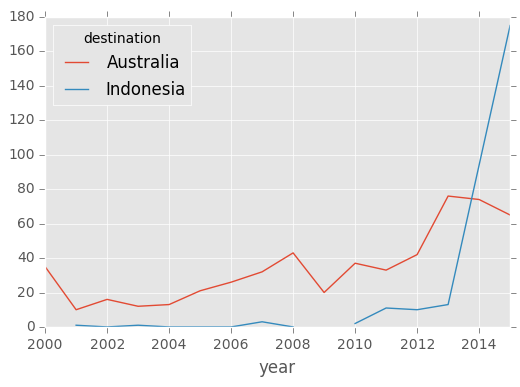

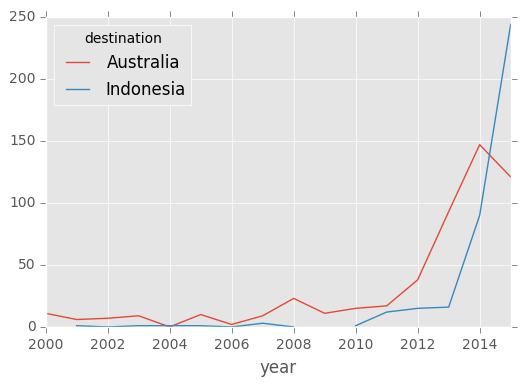

In [356]:
t = AsylumHistory[AsylumHistory.destination.isin(['Australia','Indonesia'])]
#t=t[~(t.origin.isin(['Afghanistan','Myanmar']))]
t=t[(t.origin.isin(['Ethiopia']))]

t = t[t.typeLevel.isin([u'U / FA', u'G / NA', u'G / FA', u'U / FI', u'G / FI'])]


t.groupby(['year','destination']).appliedDuringYear.sum().unstack().plot.line()

t.groupby(['year','destination']).totalYearEnd.sum().unstack().plot.line()

t

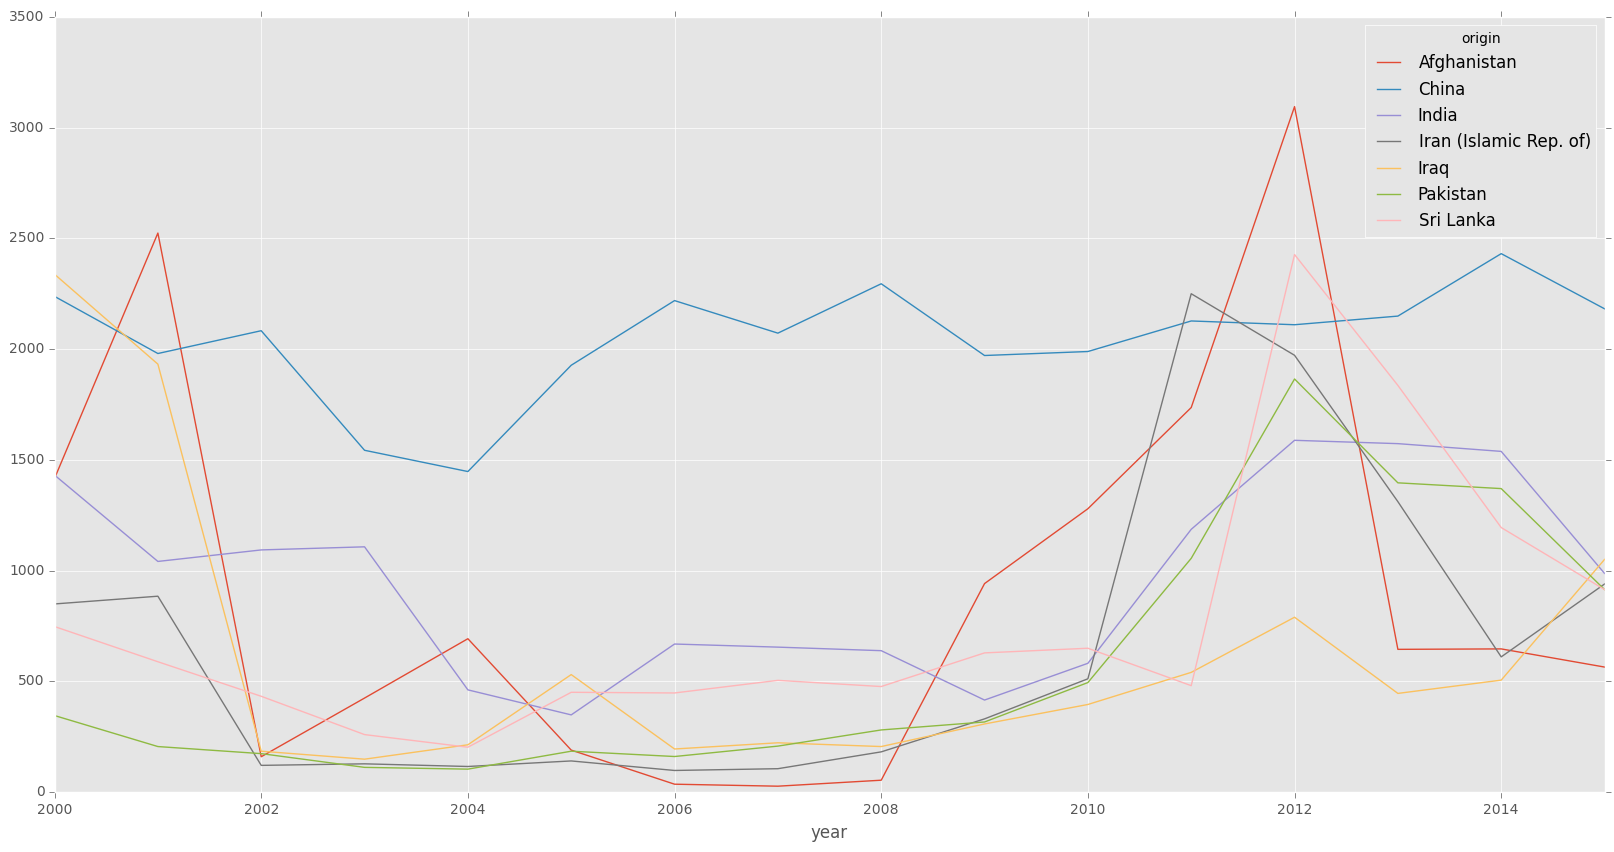

In [304]:
t = AsylumHistory[(AsylumHistory.destination.isin(['Australia']))&(~(AsylumHistory.origin.isin(['Myanmar'])))]

t=t[t.origin.isin(t.groupby('origin')['appliedDuringYear'].sum().sort_values()[-7:].index)]
t.groupby(['year','origin']).appliedDuringYear.sum().unstack().plot.line(figsize=(20,10))


In [364]:
t=AsylumHistory[(AsylumHistory.destination.isin(['Malaysia','Indonesia','Australia']))&((AsylumHistory.origin
                                    .isin(['Togo','Ghana','Senegal','Rwanda','Sierra Leone',
                                           'Uganda','Central African Rep.','Benin','Côte d\'Ivoire','Cameroon','Dem. Rep. of the Congo','Congo','Eritrea',
                                          'Guinea','Gambia','Mali','Nigeria','Somalia','Ethiopia'])))]


t.groupby(['year','destination'])['appliedDuringYear'].sum().unstack() #.plot.line()

t[(t.destination=='Indonesia')&(t.typeLevel.str.startswith('U / F'))&(t.year.isin(range(2013,2016)))][['origin']].drop_duplicates().count()

origin    17
dtype: int64

In [314]:
t=AsylumHistory[(AsylumHistory.destination.str.endswith('Indonesia'))]

t.groupby('year')['otherClosed'].sum() #.cumsum()
#t

year
2000     188
2001     703
2002     508
2003     164
2004      33
2005      45
2006      76
2007     147
2008      53
2009    1007
2010    2948
2011    2227
2012    3032
2013    4795
2014    3221
2015    1215
Name: otherClosed, dtype: int64

In [401]:
t=AsylumHistory[(AsylumHistory.year>=2013)
                &(AsylumHistory.typeLevel.str.startswith('U / F'))
                &(AsylumHistory.destination.isin(['Indonesia','Malsaysia']))]

def f(x):
    try:
        z= x.sum()
        #z['rate'] = (z['recognized'])/(z['recognized']+z['rejected'])
        return z[['recognized','rejected']]
    except:
        return 0

s=t.groupby('origin').apply(f)
s['rate']=s['recognized']/(s['recognized']+s['rejected'])
s[s.recognized>10].sort_values('rate')

,recognized,rejected,rate
origin,,,
Iran (Islamic Rep. of),489,411,0.543333
Sri Lanka,337,141,0.705021
China,23,5,0.821429
Sudan,168,20,0.893617
Iraq,286,27,0.913738
Afghanistan,3445,314,0.916467
Egypt,11,1,0.916667
Pakistan,371,28,0.929825
Eritrea,15,1,0.937500


In [340]:
indoRef=pd.read_csv('unhcr_popstats_export_persons_of_concern_2017_03_05_035147.csv')
indoRef.columns=['year','destination','origin','refugees','asylumSeekers','returned','idps','returnedIdps','stateless','others','total']


for column in indoRef.columns[3:]:
    indoRef[column]=indoRef[column].apply(numberfix)
indoRef.year=indoRef.year.apply(int)    

indoRef.groupby('year').sum()

,refugees,asylumSeekers,returned,idps,returnedIdps,stateless,others,total
year,,,,,,,,
2014,4264.0,6897,959.0,NaN,NaN,NaN,NaN,12116
2015,5955.0,7555,629.0,0.0,0.0,0.0,0.0,14134


In [337]:
print htmlToDataFramePoc('indonesiaRefugee2012.html').total.sum()
print htmlToDataFramePoc('indonesiaRefugee2013.html').total.sum()

7949
10316


In [339]:
htmlToDataFramePoc('indonesiaRefugee2012.html').sum()

year                                                         78468
destination      IndonesiaIndonesiaIndonesiaIndonesiaIndonesiaI...
origin           AfghanistanAlgeriaBangladeshCameroonCentral Af...
refugees                                                      1819
asylumSeekers                                                 6126
returned                                                         4
idps                                                             0
returnedIdps                                                     0
stateless                                                        0
others                                                           0
total                                                         7949
dtype: object

In [369]:
AsylumHistory

,year,destination,origin,typeLevel,totalYearStart,totalYearStartUnhcr,appliedDuringYear,recognized,other,rejected,otherClosed,totalDecisions,totalYearEnd,totalYearEndUnhcr
0,2015,Australia,Afghanistan,G / AR,226,0,22,144,0.0,35,1,181.0,66,0
1,2015,Australia,Afghanistan,G / FI,1215,0,542,249,0.0,33,1,286.0,1356,0
2,2015,Australia,Albania,G / AR,6,0,7,1,0.0,1,0,6.0,7,0
3,2015,Australia,Albania,G / FI,42,0,19,1,0.0,0,1,6.0,34,0
4,2015,Australia,Algeria,G / AR,1,0,1,0,0.0,1,0,1.0,1,0
5,2015,Australia,Algeria,G / FI,6,0,1,0,0.0,0,0,0.0,1,0
6,2015,Australia,Andorra,G / FI,0,0,1,0,0.0,0,0,0.0,1,0
7,2015,Australia,Argentina,G / FI,0,0,7,0,0.0,0,1,1.0,6,0
8,2015,Australia,Armenia,G / FI,0,0,0,0,0.0,0,1,1.0,0,0
9,2015,Australia,Azerbaijan,G / FI,1,0,8,0,0.0,0,0,0.0,8,0
